In [5]:
import xarray as xr
import numpy as np
# data/20180624_leipzig_classification.nc

# load the categorize file in the data folder
f = xr.open_mfdataset('data/20180624_leipzig_classification.nc')

print(f)

<xarray.Dataset>
Dimensions:                (height: 479, layer: 1, time: 2879)
Coordinates:
  * time                   (time) datetime64[ns] 2018-06-24T00:00:45.000000670 ... 2018-06-24T23:59:44.996795654
  * height                 (height) float32 304.0752 335.2544 ... 15768.959
Dimensions without coordinates: layer
Data variables:
    latitude               float32 ...
    longitude              float32 ...
    altitude               float32 ...
    target_classification  (time, height) int8 dask.array<shape=(2879, 479), chunksize=(2879, 479)>
    detection_status       (time, height) int8 dask.array<shape=(2879, 479), chunksize=(2879, 479)>
    cloud_base_height      (time, layer) float32 dask.array<shape=(2879, 1), chunksize=(2879, 1)>
    cloud_top_height       (time, layer) float32 dask.array<shape=(2879, 1), chunksize=(2879, 1)>
Attributes:
    Conventions:  CF-1.0
    title:        Classification products from Leipzig
    location:     Leipzig
    day:          24
    month:  

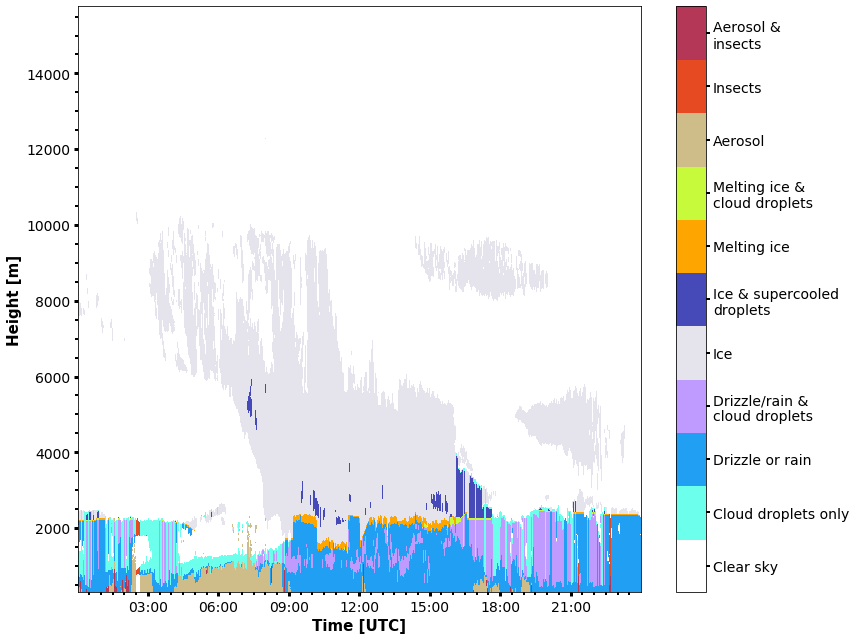

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import Colormaps

fig, ax = plt.subplots(figsize=(12,9))

pcmesh = ax.pcolormesh(
    f.time, f.height, f.target_classification.values.T,
    cmap=Colormaps.cloudnet_map, 
    vmin=-0.5, vmax=10.5
)
# show colorbar
cbar = fig.colorbar(pcmesh)
cbar.set_ticks(list(range(len(Colormaps.target_names))))
a = cbar.ax.set_yticklabels(Colormaps.target_names)

from PlottingUtility import load_xy_style, load_cbar_style
load_xy_style(ax)
load_cbar_style(cbar, cbar_label="")
fig.savefig('result_target_classification')
plt.tight_layout()
